In [331]:
#import necessary libraries
import glob
from google.colab import drive
import os # deal with dir and drive

import pandas as pd
import numpy as np


import cv2

import albumentations as albu #for data argumentation 
from albumentations import Compose, ShiftScaleRotate, Resize  #for data argumentation 
from albumentations.pytorch import ToTensor# remove it later


from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import classification_report

import shutil

import matplotlib.pyplot as plt
%matplotlib inline


In [332]:
#Read data from drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [333]:
#constant variable
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224
 
IMAGE_CHANNELS = 3 #RGB image has three channels: red, green, and blue

In [334]:

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [335]:
os.listdir('/content/drive/My Drive/rice_leaf_diseases2')

['Leaf smut', 'Bacterial leaf blight', 'Brown spot']

In [336]:
#it will be used when we call it to be printed
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    
    #This function prints and plots the confusion matrix.
    #Normalization can be applied by setting `normalize=True`.
    #normalize the confusion matrix: makes it easier for the data scientist to visually interpret how the labels 
    #are being predicted
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.clim(0, 10) set color range
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


In [337]:
#prepare the data
leaf_smut_list = \
os.listdir('/content/drive/My Drive/rice_leaf_diseases2/Leaf smut')
brown_spot_list = \
os.listdir('/content/drive/My Drive/rice_leaf_diseases2/Brown spot')
bacterial_leaf_blight_list = \
os.listdir('/content/drive/My Drive/rice_leaf_diseases2/Bacterial leaf blight')

print(len(leaf_smut_list))
print(len(brown_spot_list))
print(len(bacterial_leaf_blight_list))

40
40
40


In [338]:
#create Data Frame 
df_leaf_smut = pd.DataFrame(leaf_smut_list, columns=['image'])# just like put the images in table with 40 row and 1 column namd"image"
df_leaf_smut['target'] = 'leaf_smut' #add another column named "target" >> end with table with 40 rows and 2 colunmns 

df_brown_spot = pd.DataFrame(brown_spot_list, columns=['image'])
df_brown_spot['target'] = 'brown_spot'

df_bacterial_leaf_blight = pd.DataFrame(bacterial_leaf_blight_list, columns=['image'])
df_bacterial_leaf_blight['target'] = 'bacterial_leaf_blight'

# Create the train and val sets
  #1. Create a val set for each class
    # Sample 5 validation images from each class
df_leaf_smut_val = df_leaf_smut.sample(n=5, random_state=101) # .sample() >>Return a random sample of items from an axis of object.
df_brown_spot_val = df_brown_spot.sample(n=5, random_state=101)
df_bacterial_leaf_blight_val = df_bacterial_leaf_blight.sample(n=5, random_state=101)


print(len(df_leaf_smut_val))
print(len(df_brown_spot_val))
print(len(df_bacterial_leaf_blight_val))


5
5
5


In [339]:
print(df_leaf_smut)

           image     target
0   DSC_0316.JPG  leaf_smut
1   DSC_0315.jpg  leaf_smut
2   DSC_0330.jpg  leaf_smut
3   DSC_0314.JPG  leaf_smut
4   DSC_0321.JPG  leaf_smut
5   DSC_0331.JPG  leaf_smut
6   DSC_0328.jpg  leaf_smut
7   DSC_0293.JPG  leaf_smut
8   DSC_0335.JPG  leaf_smut
9   DSC_0313.JPG  leaf_smut
10  DSC_0318.JPG  leaf_smut
11  DSC_0308.JPG  leaf_smut
12  DSC_0338.JPG  leaf_smut
13  DSC_0327.JPG  leaf_smut
14  DSC_0312.JPG  leaf_smut
15  DSC_0339.jpg  leaf_smut
16  DSC_0309.JPG  leaf_smut
17  DSC_0322.jpg  leaf_smut
18  DSC_0320.JPG  leaf_smut
19  DSC_0319.jpg  leaf_smut
20  DSC_0336.jpg  leaf_smut
21  DSC_0317.JPG  leaf_smut
22  DSC_0310.JPG  leaf_smut
23  DSC_0513.jpg  leaf_smut
24  DSC_0507.jpg  leaf_smut
25  DSC_0506.jpg  leaf_smut
26  DSC_0500.jpg  leaf_smut
27  DSC_0505.jpg  leaf_smut
28  DSC_0501.jpg  leaf_smut
29  DSC_0508.jpg  leaf_smut
30  DSC_0516.jpg  leaf_smut
31  DSC_0509.jpg  leaf_smut
32  DSC_0512.jpg  leaf_smut
33  DSC_0503.jpg  leaf_smut
34  DSC_0502.jpg  le

In [340]:
print(df_leaf_smut_val)

           image     target
18  DSC_0320.JPG  leaf_smut
16  DSC_0309.JPG  leaf_smut
36  DSC_0514.jpg  leaf_smut
25  DSC_0506.jpg  leaf_smut
26  DSC_0500.jpg  leaf_smut


In [341]:
# Create the train set for each class

# leaf_smut
# get a list of val images
val_list = list(df_leaf_smut_val['image']) # get the val image 
 




In [342]:
print(val_list) # print just for demonestration

['DSC_0320.JPG', 'DSC_0309.JPG', 'DSC_0514.jpg', 'DSC_0506.jpg', 'DSC_0500.jpg']


In [343]:
#filter out the val images
df_leaf_smut_train = df_leaf_smut[~df_leaf_smut['image'].isin(val_list)] # ~ means not in

In [344]:
# brown_spot
# get a list of val images
val_list = list(df_brown_spot_val['image'])
# filter out the val images
df_brown_spot_train = df_brown_spot[~df_brown_spot['image'].isin(val_list)] # ~ means notin

In [345]:
# bacterial_leaf_blight
# get a list of val images
val_list = list(df_bacterial_leaf_blight_val['image'])
# filter out the val images
df_bacterial_leaf_blight_train = \
df_bacterial_leaf_blight[~df_bacterial_leaf_blight['image'].isin(val_list)] # ~ means notin



In [346]:

print(len(df_leaf_smut_train))
print(len(df_brown_spot_train))
print(len(df_bacterial_leaf_blight_train))

35
35
35


In [347]:
# Create df_data
# now we combain all the indivisual original tables to on table (120 rows and 2 columns)
df_data = pd.concat([df_leaf_smut, df_brown_spot, df_bacterial_leaf_blight], axis=0).reset_index(drop=True)#concat() method is used to merge two or more arrays


In [348]:
print(df_data)

            image                 target
0    DSC_0316.JPG              leaf_smut
1    DSC_0315.jpg              leaf_smut
2    DSC_0330.jpg              leaf_smut
3    DSC_0314.JPG              leaf_smut
4    DSC_0321.JPG              leaf_smut
..            ...                    ...
115  DSC_0389.JPG  bacterial_leaf_blight
116  DSC_0375.JPG  bacterial_leaf_blight
117  DSC_0405.JPG  bacterial_leaf_blight
118  DSC_0377.JPG  bacterial_leaf_blight
119  DSC_0393.JPG  bacterial_leaf_blight

[120 rows x 2 columns]


In [349]:
#create df_train .combine pic that picked for taining
df_train = \
pd.concat([df_leaf_smut_train, df_brown_spot_train, df_bacterial_leaf_blight_train], axis=0).reset_index(drop=True)

In [350]:
#create df_val.combine pic that picked for taining
df_val = \
pd.concat([df_leaf_smut_val, df_brown_spot_val, df_bacterial_leaf_blight_val], axis=0).reset_index(drop=True)

In [351]:

df_data = shuffle(df_data) # to mix the data
df_train = shuffle(df_train)
df_val = shuffle(df_val)


In [352]:
print(df_data)

            image                 target
32   DSC_0512.jpg              leaf_smut
47   DSC_0296.jpg             brown_spot
34   DSC_0502.jpg              leaf_smut
74   DSC_0112.jpg             brown_spot
21   DSC_0317.JPG              leaf_smut
..            ...                    ...
12   DSC_0338.JPG              leaf_smut
112  DSC_0366.jpg  bacterial_leaf_blight
118  DSC_0377.JPG  bacterial_leaf_blight
68   DSC_0292.JPG             brown_spot
10   DSC_0318.JPG              leaf_smut

[120 rows x 2 columns]


In [353]:
print(df_data.shape)
print(df_train.shape)
print(df_val.shape)

(120, 2)
(105, 2)
(15, 2)


In [354]:
df_data['target'].value_counts()

brown_spot               40
bacterial_leaf_blight    40
leaf_smut                40
Name: target, dtype: int64

In [355]:
df_train['target'].value_counts()

brown_spot               35
bacterial_leaf_blight    35
leaf_smut                35
Name: target, dtype: int64

In [356]:
df_val['target'].value_counts()

bacterial_leaf_blight    5
leaf_smut                5
brown_spot               5
Name: target, dtype: int64

In [357]:
# Create the target as index values

# combine val, train and test 
val_len = len(df_val) #length of df-val 
train_len = len(df_train)
df_combined =  pd.concat(objs=[df_val, df_train], axis=0).reset_index(drop=True) #after combine reset the index ex.0,1,2,3...


In [358]:

print(val_len)

15


In [359]:
print(df_combined)

            image                 target
0    DSC_0514.jpg              leaf_smut
1    DSC_0309.JPG              leaf_smut
2    DSC_0386.JPG  bacterial_leaf_blight
3    DSC_0305.JPG             brown_spot
4    DSC_0116.jpg             brown_spot
..            ...                    ...
115  DSC_0313.JPG              leaf_smut
116  DSC_0115.jpg             brown_spot
117  DSC_0394.jpg             brown_spot
118  DSC_0384.JPG  bacterial_leaf_blight
119  DSC_0319.jpg              leaf_smut

[120 rows x 2 columns]


In [360]:
# create the dummy variables
df_combined = pd.get_dummies(df_combined, columns=['target'])#pd.get_dummies >>Convert categorical variable into dummy/indicator variables.
                                                             #see below table to demonstrate the idea of "pd.get_dummies"

In [361]:
df_combined.head()

,image,target_bacterial_leaf_blight,target_brown_spot,target_leaf_smut
0,DSC_0514.jpg,0,0,1
1,DSC_0309.JPG,0,0,1
2,DSC_0386.JPG,1,0,0
3,DSC_0305.JPG,0,1,0
4,DSC_0116.jpg,0,1,0


In [362]:
# separate the train and val sets
df_val = df_combined[:val_len]
df_train = df_combined[val_len:]


print(df_train.shape)
print(df_val.shape)

(105, 4)
(15, 4)


In [363]:
df_train.head(10)

,image,target_bacterial_leaf_blight,target_brown_spot,target_leaf_smut
15,DSC_0111.jpg,0,1,0
16,DSC_0323.JPG,0,1,0
17,DSC_0296.jpg,0,1,0
18,DSC_0402.JPG,1,0,0
19,DSC_0367.JPG,1,0,0
20,DSC_0333.JPG,0,1,0
21,DSC_0315.jpg,0,0,1
22,DSC_0507.jpg,0,0,1
23,DSC_0504.jpg,0,0,1
24,DSC_0391.jpg,0,1,0


In [364]:
df_val.head()

,image,target_bacterial_leaf_blight,target_brown_spot,target_leaf_smut
0,DSC_0514.jpg,0,0,1
1,DSC_0309.JPG,0,0,1
2,DSC_0386.JPG,1,0,0
3,DSC_0305.JPG,0,1,0
4,DSC_0116.jpg,0,1,0


In [365]:
#Save the dataframes as compressed csv files
#These csv files will allow us to use Pandas chunking to feed images into the generators.
df_combined.to_csv('df_combined.csv.gz', compression='gzip', index=False)

df_train.to_csv('df_train.csv.gz', compression='gzip', index=False)
df_val.to_csv('df_val.csv.gz', compression='gzip', index=False)

In [366]:
!ls    #command to list computer files 

df_combined.csv.gz  df_val.csv.gz  image_dir  sample_data
df_train.csv.gz     drive	   model.h5   training_log.csv


In [367]:
#Move all images to the same folder
# Create a new directory
image_dir = 'image_dir'
os.mkdir(image_dir)

!ls

FileExistsError: ignored

In [ ]:
leaf_smut_list = \
os.listdir('/content/drive/My Drive/rice_leaf_diseases2/Leaf smut')
brown_spot_list = \
os.listdir('/content/drive/My Drive/rice_leaf_diseases2/Brown spot')
bacterial_leaf_blight_list = \
os.listdir('/content/drive/My Drive/rice_leaf_diseases2/Bacterial leaf blight')



In [ ]:
# Transfer the leaf_smut images
for fname in leaf_smut_list:
    
    path = '/content/drive/My Drive/rice_leaf_diseases2/Leaf smut/'
    
    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)

In [ ]:
# Transfer the brown_spot images
for fname in brown_spot_list:
    
    path = '/content/drive/My Drive/rice_leaf_diseases2/Brown spot/'
    
    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)
    

In [ ]:
# Transfer the bacterial_leaf_blight images
for fname in bacterial_leaf_blight_list:
    
    path = '/content/drive/My Drive/rice_leaf_diseases2/Bacterial leaf blight/'
    
    # source path to image
    src = os.path.join(path, fname)#make the image path ex./content/drive/My Drive/rice_leaf_diseases2/Bacterial leaf blight/logo.png
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)

In [ ]:
# Transfer the bacterial_leaf_blight images
for fname in bacterial_leaf_blight_list:
    
    path = '/content/drive/My Drive/rice_leaf_diseases2/Bacterial leaf blight/'
    
    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst) #shutil module offers a number of high-level operations on files and collections of files

In [ ]:
# Check how many images are now in image_dir

len(os.listdir('image_dir'))

In [ ]:
#Display some images by class

plt.figure(figsize=(15,15))#change the size of figure

In [ ]:


# Image 1
plt.subplot(1,3,1)   # 1 row and 3 columns
item = 'DSC_0512.jpg'
path = '/content/drive/My Drive/rice_leaf_diseases2/Leaf smut/' + item
image = plt.imread(path) #read the img
plt.imshow(image)
plt.xlabel('Leaf smut', fontsize=20)#the img lable with 20 font size

# Image 2
plt.subplot(1,3,2)   # 1 row and 3 columns
item = 'DSC_0108.jpg'
path = '/content/drive/My Drive/rice_leaf_diseases2/Brown spot/' + item
image = plt.imread(path)
plt.imshow(image)
plt.xlabel('Brown spot', fontsize=20)

# Image 2
plt.subplot(1,3,3)   # 1 row and 3 columns
item = 'DSC_0402.JPG'
path = '/content/drive/My Drive/rice_leaf_diseases2/Bacterial leaf blight/' + item
image = plt.imread(path)
plt.imshow(image)
plt.xlabel('Bacterial leaf blight', fontsize=20) 




# set up the canvas for the subplots
plt.figure(figsize=(15,15))

# Image 1
plt.subplot(1,3,1)   # 1 row and 3 columns
item = 'DSC_0316.JPG'
path = '/content/drive/My Drive/rice_leaf_diseases2/Leaf smut/' + item
image = plt.imread(path)
plt.imshow(image)
plt.xlabel('Leaf smut', fontsize=20)

# Image 2
plt.subplot(1,3,2)   # 1 row and 3 columns
item = 'DSC_0303.JPG'
path = '/content/drive/My Drive/rice_leaf_diseases2/Brown spot/' + item
image = plt.imread(path)
plt.imshow(image)
plt.xlabel('Brown spot', fontsize=20)

# Image 2
plt.subplot(1,3,3)   # 1 row and 3 columns
item = 'DSC_0702.jpg'
path = '/content/drive/My Drive/rice_leaf_diseases2/Bacterial leaf blight/' + item
image = plt.imread(path)
plt.imshow(image)
plt.xlabel('Bacterial leaf blight', fontsize=20)

plt.show()

In [ ]:
#Set up and test the Augmentations
#Data Augmentation is a method of artificially creating a new dataset for training from 
# the existing training dataset to improve the performance of deep learning neural network 
# with the amount of data available. It is a form of regularization which makes our model generalize better 
# than before and help to reduce overfitting.

import albumentations as albu


def augment_image(augmentation, image):
    
    
   # Uses the Albumentations library.
    
   # Inputs: 
    #1. augmentation - this is the instance of type of augmentation to do 
   # e.g. aug_type = HorizontalFlip(p=1) 
    # p=1 is the probability of the transform being executed.
    
   # 2. image - image with shape (h,w)
    #Output:
   # Augmented image as a numpy array.
    
   
    # get the transform as a dict
    aug_image_dict =  augmentation(image=image)
    # retrieve the augmented matrix of the image
    image_matrix = aug_image_dict['image']
    
    
    return image_matrix
    

In [ ]:
# Define the transforms
aug_types = albu.Compose([albu.HorizontalFlip(),albu.OneOf([albu.HorizontalFlip(),albu.VerticalFlip(), ], p=0.8),
            albu.OneOf([albu.RandomContrast(), albu.RandomGamma(), albu.RandomBrightness(),], p=0.3),
            albu.OneOf([albu.ElasticTransform(alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
            albu.GridDistortion(), albu.OpticalDistortion(distort_limit=2, shift_limit=0.5), ], p=0.3),
            albu.ShiftScaleRotate()
            ])

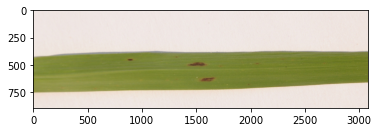

In [ ]:
# Get an image to test transformations

# get a list of train png images
path = 'image_dir/'
image_list = os.listdir('image_dir')

fname = image_list[36]
image_path = path + fname

image = plt.imread(image_path)
plt.imshow(image)

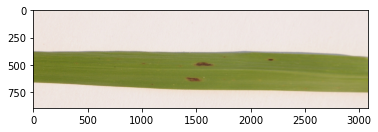

In [ ]:
# Test the transformation setup.
# The image will be different each time this cell is run. ***try it girls

aug_image = augment_image(aug_types, image)

plt.imshow(aug_image)

In [ ]:
print (aug_image) #want to see the matrix

[[[239 224 221]
  [238 223 220]
  [238 223 220]
  ...
  [241 230 226]
  [241 230 226]
  [241 230 226]]

 [[238 223 220]
  [238 223 220]
  [238 223 220]
  ...
  [240 231 226]
  [240 231 226]
  [240 231 226]]

 [[237 222 219]
  [239 224 221]
  [239 224 221]
  ...
  [240 231 226]
  [240 231 226]
  [240 231 226]]

 ...

 [[240 229 225]
  [242 229 223]
  [241 228 222]
  ...
  [239 230 225]
  [239 230 225]
  [239 230 225]]

 [[238 227 223]
  [241 228 222]
  [240 227 221]
  ...
  [238 229 224]
  [238 229 224]
  [238 229 224]]

 [[238 227 221]
  [240 229 223]
  [240 229 223]
  ...
  [239 230 225]
  [238 229 224]
  [238 229 224]]]


In [ ]:
#Build the Data Generators
#1. Train Generator
df_train.head(10)

,image,target_bacterial_leaf_blight,target_brown_spot,target_leaf_smut
15,DSC_0111.jpg,0,1,0
16,DSC_0323.JPG,0,1,0
17,DSC_0296.jpg,0,1,0
18,DSC_0402.JPG,1,0,0
19,DSC_0367.JPG,1,0,0
20,DSC_0333.JPG,0,1,0
21,DSC_0315.jpg,0,0,1
22,DSC_0507.jpg,0,0,1
23,DSC_0504.jpg,0,0,1
24,DSC_0391.jpg,0,1,0


In [ ]:
def train_generator(batch_size=5):#sill i will understand it more and tell you girls
    
    while True:
        
        # load the data in chunks (batches)
        for df in pd.read_csv('df_train.csv.gz', chunksize=batch_size):
            
            # get the list of images
            image_id_list = list(df['image'])
            
            # Create empty X matrix - 3 channels
            X_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS), dtype=np.uint8) 
            #Return a new array of given shape and type, filled with zeros.

            # Create X_train
            #================
            
            for i in range(0, len(image_id_list)):#put data in x-train
              
              
                # get the image and mask
                image_id = image_id_list[i]


                # set the path to the image
                path = 'image_dir/' + image_id

                # read the image
                image = cv2.imread(path)# the function cv2.imread() to read an image. 
                #The image should be in the working directory or a full path of image should be given.

                # convert to from BGR to RGB   BGR (blue, green, red).  RGB (red, green, blue)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                
                # resize the image
                image = cv2.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))

                 # Create y_train
            # ===============
                cols = ['target_bacterial_leaf_blight', 'target_brown_spot', 'target_leaf_smut']
                y_train = df[cols]
                y_train = np.asarray(y_train) #Convert the input to an array.


               # Augment the image and mask
            # ===========================

                aug_image = augment_image(aug_types, image)
              
                # insert the image into X_train
                X_train[i] = aug_image
                
                          
                
            # Normalize the images
            X_train = X_train/255

            yield X_train, y_train

In [ ]:
# Test the generator

# initialize
train_gen = train_generator(batch_size=5)

# run the generator
X_train, y_train = next(train_gen)

print(X_train.shape)
print(y_train.shape)

(5, 224, 224, 3)
(5, 3)


In [ ]:
y_train

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0]])

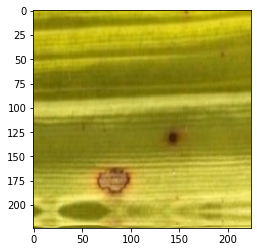

In [ ]:
# Print the first image in X_train
# Remember that train images have been augmented.

image = X_train[0,:,:,:]
plt.imshow(image)

In [ ]:
#Val Generator
def val_generator(batch_size=5):
    
    while True:
        
        # load the data in chunks (batches)
        for df in pd.read_csv('df_val.csv.gz', chunksize=batch_size):
            
            # get the list of images
            image_id_list = list(df['image'])
            
            # Create empty X matrix - 3 channels
            X_val = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS), dtype=np.uint8)
             # Create X_val
            #================
            
            for i in range(0, len(image_id_list)):
              
              
                # get the image and mask
                image_id = image_id_list[i]


                # set the path to the image
                path = 'image_dir/' + image_id

                # read the image
                image = cv2.imread(path)
                # convert to from BGR to RGB
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                
                # resize the image
                image = cv2.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))

                # insert the image into X_train
                X_val[i] = image
                # Create y_val
            # ===============

                cols = ['target_bacterial_leaf_blight', 'target_brown_spot', 'target_leaf_smut']
                y_val = df[cols]
                y_val = np.asarray(y_val) 

                # change the shape to (batch_size, 1)
                #y_val = y_val.reshape((-1, 1)) # -1 tells numpy to automatically detect the batch size
      
            # Normalize the images
            X_val = X_val/255

            yield X_val, y_val

In [ ]:
# Test the generator

# initialize
val_gen = val_generator(batch_size=5)

# run the generator
X_val, y_val = next(val_gen)

print(X_val.shape)
print(y_val.shape)

(5, 224, 224, 3)
(5, 3)


In [ ]:
y_val

array([[0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0]])

In [ ]:
#Test Generator
def test_generator(batch_size=1):
    
    while True:
        
        # load the data in chunks (batches)
        for df in pd.read_csv('df_val.csv.gz', chunksize=batch_size):
            
            # get the list of images
            image_id_list = list(df['image'])
            
            # Create empty X matrix - 3 channels
            X_test = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS), dtype=np.uint8)

             # Create X_test
            #================
            
            for i in range(0, len(image_id_list)):
              
              
                # get the image and mask
                image_id = image_id_list[i]


                # set the path to the image
                path = 'image_dir/' + image_id

                # read the image
                image = cv2.imread(path)
                
                # convert to from BGR to RGB
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                
                # resize the image
                image = cv2.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))

                # insert the image into X_train
                X_test[i] = image
                
                 
                
            # Normalize the images
            X_test = X_test/255

            yield X_test

In [ ]:
# Test the generator

# initialize
test_gen = test_generator(batch_size=1)

# run the generator
X_test = next(test_gen)

print(X_test.shape)

(1, 224, 224, 3)


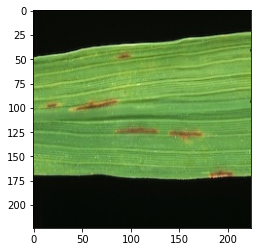

In [ ]:
# print the image from X_test

image = X_test[0,:,:,:]
plt.imshow(image)

In [ ]:
#Model Architecture
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.metrics import categorical_accuracy

from tensorflow.keras.callbacks import (EarlyStopping, ReduceLROnPlateau, 
                                        ModelCheckpoint, CSVLogger, LearningRateScheduler)

from tensorflow.keras.applications.mobilenet import MobileNet

In [ ]:
model = MobileNet(weights='imagenet')

# Exclude the last 2 layers of the above model.
x = model.layers[-2].output

# Create a new dense layer for predictions
# 3 corresponds to the number of classes
predictions = Dense(3, activation='softmax')(x)

# inputs=model.input selects the input layer, outputs=predictions refers to the
# dense layer we created above.

model = Model(inputs=model.input, outputs=predictions)

model.summary()

In [ ]:
#Train the Model
TRAIN_BATCH_SIZE = 5
VAL_BATCH_SIZE = 5

num_train_samples = len(df_train)
num_val_samples = len(df_val)
train_batch_size = TRAIN_BATCH_SIZE
val_batch_size = VAL_BATCH_SIZE

# determine numtrain steps
train_steps = np.ceil(num_train_samples / train_batch_size)
# determine num val steps
val_steps = np.ceil(num_val_samples / val_batch_size)

In [ ]:
# Initialize the generators
train_gen = train_generator(batch_size=TRAIN_BATCH_SIZE)
val_gen = val_generator(batch_size=VAL_BATCH_SIZE)

model.compile(Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'],)#Configures the model for training.

#.................
filepath = "model.h5"



checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, 
                             save_best_only=True, mode='max')#Callback to save the Keras model or model weights at some frequency.




log_fname = 'training_log.csv'
csv_logger = CSVLogger(filename=log_fname,
                       separator=',',
                       append=False)

callbacks_list = [checkpoint, csv_logger]
#...........................


history = model.fit_generator(train_gen, steps_per_epoch=train_steps, epochs=10, 
                              validation_data=val_gen, validation_steps=val_steps,
                             verbose=1,
                             callbacks=callbacks_list)# fit >>Trains the model for a fixed number of epochs (iterations on a dataset).




In [ ]:
# Display the training log

train_log = pd.read_csv('training_log.csv')

train_log.head()

In [ ]:
# get the metric names so we can use evaulate_generator
model.metrics_names

In [ ]:
model.load_weights('model.h5')

val_gen = val_generator(batch_size=1)

val_loss, val_acc = \
model.evaluate_generator(val_gen, steps=len(df_val))

print('val_loss:', val_loss)
print('val_acc:', val_acc)

In [ ]:
# display the loss and accuracy curves

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.show()

In [ ]:
#Make a prediction on the val set

test_gen = test_generator(batch_size=1)

preds = model.predict_generator(test_gen, steps=len(df_val), verbose=1)

In [ ]:
# get y_pred as index values

y_pred = np.argmax(preds, axis=1)

y_pred

In [ ]:
# get y_true as index values

cols = ['target_bacterial_leaf_blight', 'target_brown_spot', 'target_leaf_smut']
y_true = df_val[cols]
y_true = np.asarray(y_true) 

y_true = np.argmax(y_true, axis=1)

y_true

In [ ]:
# Compare y_true and y_pred

print(y_pred)
print(y_true)

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import itertools

cm = confusion_matrix(y_true, y_pred)

In [ ]:

# bacterial_leaf_blight = 0
# brown_spot = 1
# leaf_smut = 2

cm_plot_labels = ['leaf_blight', 'brown_spot', 'leaf_smut']

plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [ ]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_true, y_pred, target_names=['bacterial_leaf_blight', 'brown_spot', 'leaf_smut'])

print(report)